In [1]:
from tensorflow.keras import *

data_root = utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

IMAGE_SIZE = 224
image_generator = preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 3670 images belonging to 5 classes.


In [2]:
import tensorflow_hub as hub

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), trainable=False)

model = Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes)
])

model.compile(
  optimizer=optimizers.Adam(),
  loss=losses.CategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [3]:
epochs = 5
history = model.fit(image_data, epochs=epochs,
                    steps_per_epoch=len(image_data))

Epoch 1/5
115/115 [==============================] - 13s 110ms/step - loss: 0.6758 - acc: 0.7545
Epoch 2/5
115/115 [==============================] - 13s 112ms/step - loss: 0.3369 - acc: 0.8837
Epoch 3/5
115/115 [==============================] - 13s 110ms/step - loss: 0.2696 - acc: 0.9139
Epoch 4/5
115/115 [==============================] - 13s 110ms/step - loss: 0.2227 - acc: 0.9343
Epoch 5/5
115/115 [==============================] - 13s 110ms/step - loss: 0.1959 - acc: 0.9428


--2020-10-24 11:09:12--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/daisy-flower-1532449822.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 442199 (432K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 431.83K  --.-KB/s    in 0.02s   

2020-10-24 11:09:12 (25.9 MB/s) - ‘image.jpg’ saved [442199/442199]

daisy


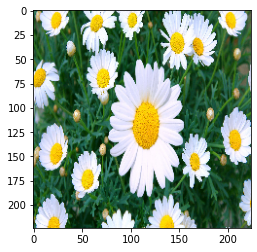

In [4]:
!wget -O image.jpg https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/daisy-flower-1532449822.jpg

img = preprocessing.image.load_img('image.jpg',
                                   target_size=(IMAGE_SIZE, IMAGE_SIZE))
x = preprocessing.image.img_to_array(img)
x = backend.expand_dims(x, axis=0)

import matplotlib.pyplot as plt
plt.imshow(img)

pred = model.predict(x)
index = backend.argmax(pred)
labels = list(image_data.class_indices.keys())
print(labels[index[0]])